https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

In [32]:
# Late in this Notebook the Keras Model is converted to Apple's coreML format; only Keras 2.0.4
#  is supported as of creation of this notebook
!sudo pip install keras==2.0.4

The directory '/home/nimbix/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/nimbix/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator 
from keras import callbacks
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## Aquire and classify training data for Hotdogs

In [6]:
!cp -r ../NotHotdog-Classifier/data .

There are several places to aquire datasets that are classififed.  for this example I've used Image.net to aquire images of hotdogs and food items that are not hotdogs

www.image-net.org/

ImageNet is a database of images organized according to the WordNet hierarchy, where each concept described by multiple words is grouped in a 'synonym set'.  The synsets are thumbnails of images and contain links to images that have been classified.  

A major drawback of ImageNet revolves around where images are located; ImageNet doesn't keep a database of images but links to where images are, or were at one time. ImageNet doesn't save you from the task of cleaning and reviewing your data before jumping into the fun stuff.


### Downloading images

In [3]:
# input image dimensions
img_rows, img_cols = 64, 64
# the CIFAR10 images are RGB
img_channels = 3

batch_size = 1024


In [4]:
classifier = Sequential()

In [5]:
classifier.add(Conv2D(32, (3, 3), input_shape = (img_rows, img_cols, img_channels), activation = 'relu'))

In [6]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [7]:
classifier.add(Flatten())

In [8]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [9]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [10]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Data augmentation w/ImageDataGenerator

Using Keras's ImageDataGenerator we solve several problems with large datasets
    1. Eliminate the need to store our entire dataset in memory
    2. Supplement dataset with additional training images
    3. Improve model robustness by producing different color and oritntation profiles of images
    

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('hotdog_data/training_set',
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    class_mode = 'binary')
    
test_set = test_datagen.flow_from_directory('hotdog_data/validation_set',
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    class_mode = 'binary')

Found 5365 images belonging to 2 classes.
Found 460 images belonging to 1 classes.


**Taking a look at some of the sample generated images in the training set**

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


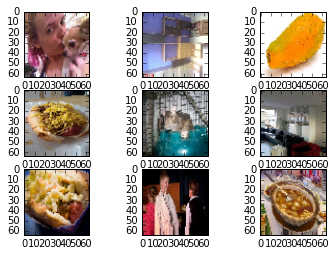

In [12]:

from matplotlib import pyplot
%matplotlib inline


    
for i in range(0, 9):
    x,y = training_set.next()
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x[i].reshape(img_rows, img_cols, img_channels))
    # show the plot
pyplot.show()    


In [13]:
class LossHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('val_loss'))
        print('-----------------------------------------------------------------------')
        print('Epoch ' + str(epoch) + ' - Validation loss: ' + str(logs.get('val_loss')) + ' accuracy : ' + str(logs.get('val_acc')))
        print('-----------------------------------------------------------------------')

    #def on_batch_end(self,batch,logs={}):
    #    print('Batch ' + str(batch) + ' - Validation loss: ' + str(logs.get('loss')) + ', validation accuracy: ' + str(logs.get('acc')))


In [14]:
checkpoint_all = ModelCheckpoint(filepath= "seefood_weights.{epoch:02d}.hdf5", verbose=1, save_best_only=False)
checkpoint_best = ModelCheckpoint(filepath= "seefood_bestWeights.hdf5", verbose=1, save_best_only=True)
history = LossHistory()

In [16]:
history = classifier.fit_generator(training_set,
    steps_per_epoch = 30000/batch_size,
    epochs = 50,
    validation_data = test_set,
    validation_steps = 10,
    callbacks = [history, checkpoint_all, checkpoint_best])

Epoch 1/50
28/29 [===========================>..] - ETA: 5s - loss: 0.5167 - acc: 0.7498 -----------------------------------------------------------------------
Epoch 0 - Validation loss: 1.21696285009 accuracy : 0.0
-----------------------------------------------------------------------
Epoch 00000: saving model to seefood_weights.00.hdf5
Epoch 00000: val_loss improved from 1.36261 to 1.21696, saving model to seefood_bestWeights.hdf5
29/29 [==============================] - 189s - loss: 0.5165 - acc: 0.7491 - val_loss: 1.2170 - val_acc: 0.0000e+00
Epoch 2/50
28/29 [===========================>..] - ETA: 4s - loss: 0.4792 - acc: 0.7457-----------------------------------------------------------------------
Epoch 1 - Validation loss: 0.987491726875 accuracy : 0.0
-----------------------------------------------------------------------
Epoch 00001: saving model to seefood_weights.01.hdf5
Epoch 00001: val_loss improved from 1.21696 to 0.98749, saving model to seefood_bestWeights.hdf5
29/29 

Epoch 00015: val_loss did not improve
29/29 [==============================] - 175s - loss: 0.3781 - acc: 0.8148 - val_loss: 0.9494 - val_acc: 0.5891
Epoch 17/50
28/29 [===========================>..] - ETA: 4s - loss: 0.3767 - acc: 0.8156-----------------------------------------------------------------------
Epoch 16 - Validation loss: 0.807778984308 accuracy : 0.697826057673
-----------------------------------------------------------------------
Epoch 00016: saving model to seefood_weights.16.hdf5
Epoch 00016: val_loss improved from 0.91106 to 0.80778, saving model to seefood_bestWeights.hdf5
29/29 [==============================] - 167s - loss: 0.3770 - acc: 0.8161 - val_loss: 0.8078 - val_acc: 0.6978
Epoch 18/50
28/29 [===========================>..] - ETA: 4s - loss: 0.3879 - acc: 0.8106-----------------------------------------------------------------------
Epoch 17 - Validation loss: 1.06437168121 accuracy : 0.469565197825
---------------------------------------------------------

28/29 [===========================>..] - ETA: 4s - loss: 0.2763 - acc: 0.8828-----------------------------------------------------------------------
Epoch 48 - Validation loss: 1.02145979404 accuracy : 0.639130395651
-----------------------------------------------------------------------
Epoch 00048: saving model to seefood_weights.48.hdf5
Epoch 00048: val_loss did not improve
29/29 [==============================] - 170s - loss: 0.2769 - acc: 0.8825 - val_loss: 1.0215 - val_acc: 0.6391
Epoch 50/50
28/29 [===========================>..] - ETA: 4s - loss: 0.2752 - acc: 0.8835-----------------------------------------------------------------------
Epoch 49 - Validation loss: 0.9315718472 accuracy : 0.680434769392
-----------------------------------------------------------------------
Epoch 00049: saving model to seefood_weights.49.hdf5
Epoch 00049: val_loss did not improve
29/29 [==============================] - 174s - loss: 0.2752 - acc: 0.8834 - val_loss: 0.9316 - val_acc: 0.6804


**Tuning and additional epochs are necessary to improve the models accuracy**

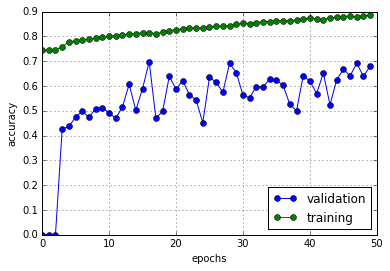

In [19]:
pyplot.plot(history.epoch,history.history['val_acc'],'-o',label='validation')
pyplot.plot(history.epoch,history.history['acc'],'-o',label='training')

pyplot.legend(loc=0)
pyplot.xlabel('epochs')
pyplot.ylabel('accuracy')
pyplot.grid(True)
pyplot.show()

In [ ]:
results = classifier.evaluate_generator(test_set, 8000)
print(results)

# Make Predictions!

In [20]:
classifier.save('hotdog_nothotdog.hdf5')

In [31]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [59]:
print(training_set.class_indices)

{'not-hotdog': 1, 'hotdog': 0}


In [67]:
!wget https://nae-165-254-189-50.broker.jarvice.com/view/NotHotdog-Classifier/data/validation/hotdog/10015.jpg

--2018-01-24 03:39:45--  https://nae-165-254-189-50.broker.jarvice.com/view/NotHotdog-Classifier/data/validation/hotdog/10015.jpg
Resolving nae-165-254-189-50.broker.jarvice.com (nae-165-254-189-50.broker.jarvice.com)... 165.254.188.27
Connecting to nae-165-254-189-50.broker.jarvice.com (nae-165-254-189-50.broker.jarvice.com)|165.254.188.27|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized

Username/Password Authentication Failed.


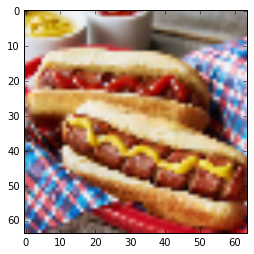

1/1 [==============================] - 0s
nothotdog


In [66]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('spiral-hot-dog-slicer1-300x250.jpg', target_size = (64, 64))

pyplot.imshow(test_image)
pyplot.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image, verbose=1)

if result[0][0] == 0:
    prediction = 'hotdog'
else:
    prediction = 'nothotdog'
    
print(prediction)

In [61]:
!wget http://image.pbs.org/video-assets/TW7jGed-asset-mezzanine-16x9-o1Ezudq.jpg.focalcrop.767x431.50.10.jpg

--2018-01-24 03:37:44--  http://image.pbs.org/video-assets/TW7jGed-asset-mezzanine-16x9-o1Ezudq.jpg.focalcrop.767x431.50.10.jpg
Resolving image.pbs.org (image.pbs.org)... 205.185.216.10, 205.185.216.42
Connecting to image.pbs.org (image.pbs.org)|205.185.216.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33063 (32K) [image/jpeg]
Saving to: 'TW7jGed-asset-mezzanine-16x9-o1Ezudq.jpg.focalcrop.767x431.50.10.jpg'

TW7jGed-asset-mezza 100%[===================>]  32.29K  --.-KB/s    in 0s      

2018-01-24 03:37:44 (549 MB/s) - 'TW7jGed-asset-mezzanine-16x9-o1Ezudq.jpg.focalcrop.767x431.50.10.jpg' saved [33063/33063]



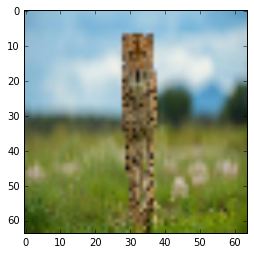

1/1 [==============================] - 0s
nothotdog


In [63]:
test_image = image.load_img('TW7jGed-asset-mezzanine-16x9-o1Ezudq.jpg.focalcrop.767x431.50.10.jpg', target_size = (64, 64))


pyplot.imshow(test_image)
pyplot.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image, verbose=1)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'hotdog'
else:
    prediction = 'nothotdog'
    
print(prediction)

# Convert to coreML

In [25]:
!sudo pip install coremltools

The directory '/home/nimbix/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/nimbix/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |������������������������������������������������������������������������������������������������| 3.2MB 319kB/s eta 0:00:01
    100% |������������������������������������������������������������������������������������������������| 389kB 2.6MB/s eta 0:00:01
  Found existing installation: protobuf 2.6.1
    Uninstalling protobuf-2.6.1:
      Successfully uninstalled protobuf-2.6.1


In [26]:
from keras.models import load_model
from keras.layers import Input, Dense
from tensorflow import Tensor
from keras import backend as K
from keras.engine import InputLayer
import coremltools   

In [27]:
model = load_model('hotdog_nothotdog.hdf5')

In [28]:
output_labels = ['hotdog', 'nothotdog']
coreml_model = coremltools.converters.keras.convert('hotdog_nothotdog.hdf5',input_names='image',image_input_names = 'image',class_labels = output_labels)   
coreml_model.author = 'Justin McCoy'   
coreml_model.short_description = 'SeeFood: Model to classify images as either hotdog or nothotdog'
coreml_model.input_description['image'] = 'Image of food that might be a hotdog'   


coreml_model.save('seefood.mlmodel') 

print coreml_model   

0 : conv2d_1_input, <keras.engine.topology.InputLayer object at 0x14015df27f10>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x14015df27dd0>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x14015e802850>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x14015df27ed0>
4 : flatten_1, <keras.layers.core.Flatten object at 0x14015df302d0>
5 : dense_1, <keras.layers.core.Dense object at 0x14015df30390>
6 : dense_1__activation__, <keras.layers.core.Activation object at 0x100061840190>
7 : dense_2, <keras.layers.core.Dense object at 0x14015df71590>
8 : dense_2__activation__, <keras.layers.core.Activation object at 0x14015e8028d0>
input {
  name: "image"
  shortDescription: "Image of food that might be a hotdog"
  type {
    imageType {
      width: 64
      height: 64
      colorSpace: RGB
    }
  }
}
output {
  name: "output1"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    